In [1]:
### Import libraries

%matplotlib inline
import xarray as xr

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
### Base path to files
base_path = '/nethome/5867800/'

In [3]:
### Prepare bathymetric data

# Load data Nooteboom et al. (2022)
topo = xr.open_dataset(base_path + 'grid/adapted_bathymetry.nc')

# Load latitudes, longitudes and bathymetry
lats  = topo.variables['T_LAT_2D'][:,:]
lons  = topo.variables['T_LON_2D'][:,:]
latsu = topo.variables['U_LAT_2D'][:,:]
lonsu = topo.variables['U_LON_2D'][:,:]
bathy = topo.variables['Bathymetry'][:,:]

# Average Weddell Sea region salinity

In the calculation of the basal melt of icebergs, usually the internal ice temperature $T_i=-4$ &deg;C is used. However, FitzMaurice and Stern (2018) have shown that using the freezing temperature $T_f$, approximated by using salinity as $T_f\approx\alpha S_0+\beta$ (where $\alpha=-5.73E-2$ &deg;C PSU$^{-1}$ and $\beta=9.39E-2$ &deg;C), gives better results.

However, as we expect the variations of salinity in the Southern Ocean to be relatively minor, we determine an average salinity for the Weddell Sea region based on a single model day to limit data usage.

Load and inspect the datafile:

In [64]:
sal = xr.open_dataset('/storage/shared/pop/p21a.EO38Ma.tx0.1.2pic_control/daily/SALT_00380101.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/storage/shared/pop/p21a.EO38Ma.tx0.1.2pic_control/daily/SALT_00380101.nc'

Land values are set to zero everywhere, replace these by NaN and plot the mean values:

In [214]:
salnan = sal['SALT'].where(sal['SALT'] > 0)

In [215]:
salnan.min(), salnan.max()

(<xarray.DataArray 'SALT' ()>
 array(0.02496704),
 <xarray.DataArray 'SALT' ()>
 array(0.05222407))

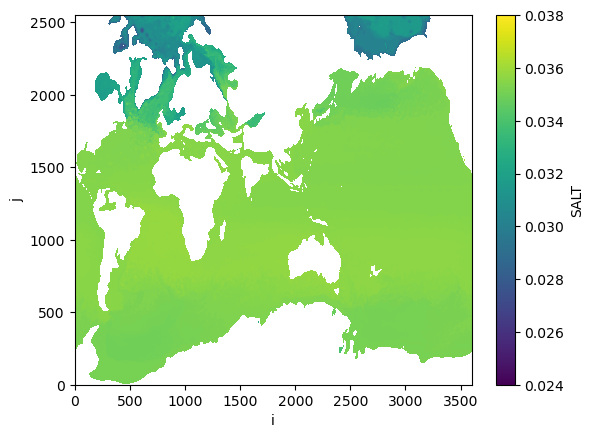

In [216]:
salnan.mean('k').plot(vmin=0.024, vmax=0.038);

Use the Weddell Sea region as reference: plot mean salinity through depth. Select for $100<i<1000$ and $0<j<450$.

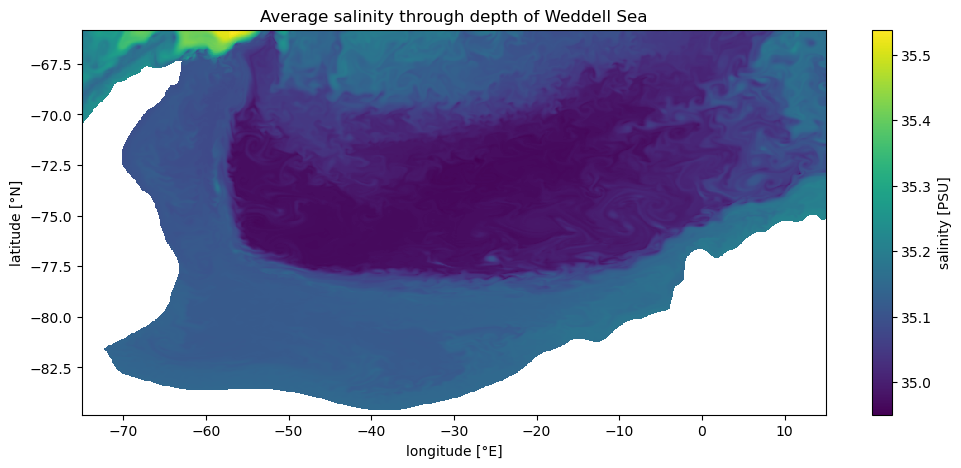

In [225]:
s = salnan.isel(i=slice(100,1000), j=slice(0,450)).mean('k')
xx, yy = np.meshgrid(lons.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('j_index'), lats.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('i_index'))

fig, ax = plt.subplots(figsize=(12,5))
im = ax.pcolormesh(xx, yy, s*1000.)#, vmin=0.024, vmax=0.038)
cb = fig.colorbar(im, ax=ax)
cb.set_label(label='salinity [PSU]')#,weight='bold')
ax.set_xlabel('longitude [°E]')
ax.set_ylabel('latitude [°N]')
ax.set_title('Average salinity through depth of Weddell Sea')
plt.show()

Now, determine the mean salinity along a latitudinal transect in the Weddell Sea region.

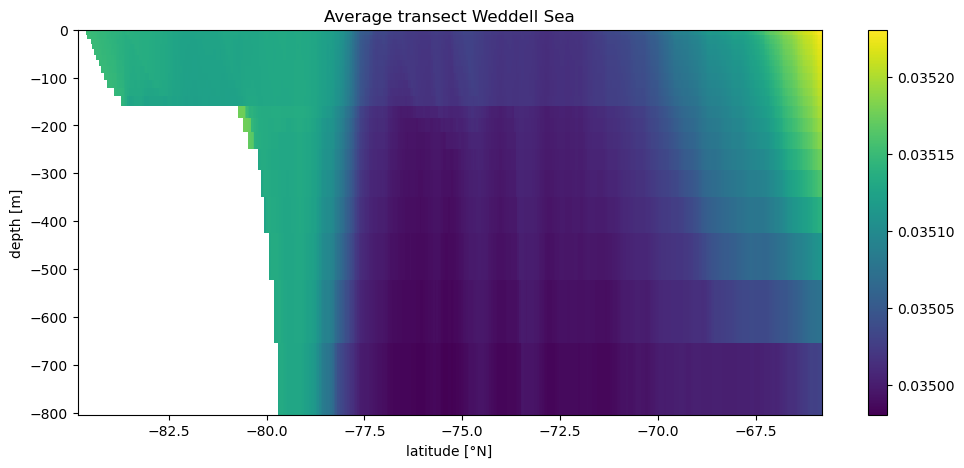

In [174]:
s = salnan.isel(i=slice(100,1000), j=slice(0,450)).mean('i')
xx, yy = np.meshgrid(lats.isel(i_index=slice(100,1000), j_index=slice(0,450)).mean('i_index'), dep)

fig, ax = plt.subplots(figsize=(12,5))
im = ax.pcolormesh(xx, -yy, s)#, vmin=0.024, vmax=0.038)
fig.colorbar(im, ax=ax)
ax.set_xlabel('latitude [°N]')
ax.set_ylabel('depth [m]')
ax.set_title('Average transect Weddell Sea')
plt.show()

Finally, calculate the mean salinity in the Weddell Sea from this transect...

In [227]:
Savg = salnan.isel(i=slice(100,1000), j=slice(0,450)).mean().data
Savg*1000.

35.063162446022034

and use this to calculate an average freezing temperature in &deg;C...

In [228]:
Tf = -5.73e-2*(Savg*1000.) + 9.39e-2
Tf

-1.9152192081570623